In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Datos MOONS

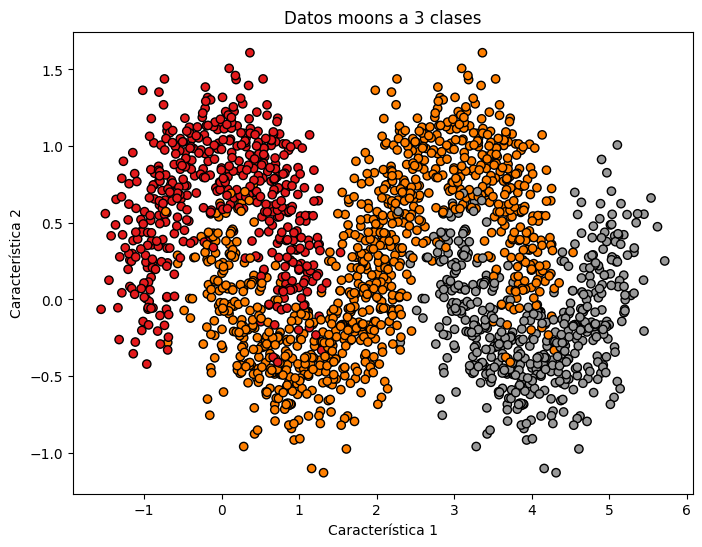

In [198]:
# Datos sintéticos de make_moons (2 clases)
X1, y1 = make_moons(n_samples=1000, noise=0.25, random_state=42)
X2, y2 = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Crear tercera clase recorriendo coordenadas para la mitad de los datos y creando nueva etiqueta
X2[:, 0] += 3  # aplicar un desplazamiento en eje x
y2 = y2 + 1    # asignar nueva etiqueta

# Combinar los datos
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Representación one-hot
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = one_hot_encoder.fit_transform(y.reshape(-1, 1))


# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Datos moons a 3 clases')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir conjuntos de prueba y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)


## Funciones de activacion y perdida

In [200]:
#Funcion de perdida
def loss_function(y_hat,y):
    return np.mean((y_hat-y)**2)

#Derivada de la funcion de perdida
def d_loss_function(y_hat,y):
    n = y_hat.shape[0]
    return (2/n)*np.sum(y_hat-y)

#Funcion de activacion 1
def relu(z):
    return np.maximum(z,0)
    
#Derivada de la funcion de activacion 1
def d_relu(z):
    return np.where(z>0,1,0)
    
#Funcion de la funcion activacion 2
def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sigmoid(a):
    return a*(1-a)

#Derivada de tanh

def d_tanh(a):
    return a*(1-a**2)

lr = 0.1


## Derivadas parciales con respecto a la funcion de perdida

Derivadas considerando la funcion sigmoide

In [201]:
#Derivada de la perdida respecto a W3
def DL_W3(y_hat,y,a2):
    return a2.T@(y_hat-y)
#Derivada de la perdida respecto a W2
def DL_W2(y_hat,y,W3,a2,a1):
    return a1.T@((y_hat-y)@W3.T*(d_sigmoid(a2)))
#Derivada de la perdida respecto a b2
def DL_b2(y_hat,y,W3,a2):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2)))
#Derivada de la perdida respecto a W1
def DL_W1(y_hat,y,W3,W2,a2,z1,X):
    return X.T@((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))
#Derivada de la perdida respecto a b1
def DL_b1(y_hat,y,W3,W2,a2,z1):
    return np.sum((y_hat-y)@W3.T*(d_sigmoid(a2))@W2.T*d_relu(z1))

Derivadas considerando la funcion $tanh(z)$

In [202]:
#Derivada de la perdida respecto a W3
def DL_W3_2(y_hat,y,a2):
    return a2.T@(y_hat-y)
#Derivada de la perdida respecto a W2
def DL_W2_2(y_hat,y,W3,a2,a1):
    return a1.T@((y_hat-y)@W3.T*(d_tanh(a2)))
#Derivada de la perdida respecto a b2
def DL_b2_2(y_hat,y,W3,a2):
    return np.sum((y_hat-y)@W3.T*(d_tanh(a2)))
#Derivada de la perdida respecto a W1
def DL_W1_2(y_hat,y,W3,W2,a2,z1,X):
    return X.T@((y_hat-y)@W3.T*(d_tanh(a2))@W2.T*d_relu(z1))
#Derivada de la perdida respecto a b1
def DL_b1_2(y_hat,y,W3,W2,a2,z1):
    return np.sum((y_hat-y)@W3.T*(d_tanh(a2))@W2.T*d_relu(z1))

### Propagacion hacia delante 

In [203]:

#Propagacion hacia delante es 
#con la funcion sigmoide para la segunda capa oculta
def feed_forward_1(X,W1,W2,W3,b1,b2):
    #Primer capa oculta
    z_1 = X@W1+b1
    a_1 = relu(z_1)
    #SEgunda capa oculta
    z_2 = a_1@W2+b2
    a_2 = sigmoid(z_2)
    #Capa de salida
    y_hat = a_2@W3

    return z_1,a_1,z_2,a_2,y_hat    


#Propagacion hacia delante es con 
#la funcion tanh para la segunda capa oculta

def feed_forward_2(X,W1,W2,W3,b1,b2):
    #Primer capa oculta
    z_1 = X@W1+b1
    a_1 = relu(z_1)
    #SEgunda capa oculta
    z_2 = a_1@W2+b2
    a_2 = np.tanh(z_2)
    #Capa de salida
    y_hat = a_2@W3

    return z_1,a_1,z_2,a_2,y_hat    

### Propagacion hacia atras

In [204]:
def backpropagation_1(X,Y,W1,W2,W3,b1,b2):
    z1,a1,z2,a2,yhat = feed_forward_1(X,W1,W2,W3,b1,b2)
    
    dW3 = DL_W3(yhat,Y,a2)
    dW2 = DL_W2(yhat,Y,W3,a2,a1)
    db2 = DL_b2(yhat,Y,W3,a2)
    dW1 = DL_W1(yhat,Y,W3,W2,a2,z1,X_train)
    db1 = DL_b1(yhat,Y,W3,W2,a2,z1)

    return dW1,dW2,dW3,db1,db2,yhat

def backpropagation_2(X,Y,W1,W2,W3,b1,b2):
    z1,a1,z2,a2,yhat = feed_forward_2(X,W1,W2,W3,b1,b2)
    
    dW3 = DL_W3_2(yhat,Y,a2)
    dW2 = DL_W2_2(yhat,Y,W3,a2,a1)
    db2 = DL_b2_2(yhat,Y,W3,a2)
    dW1 = DL_W1_2(yhat,Y,W3,W2,a2,z1,X_train)
    db1 = DL_b1_2(yhat,Y,W3,W2,a2,z1)

    return dW1,dW2,dW3,db1,db2,yhat

### Actualizacion de pesos

In [205]:
def update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr):
    
    W1 -= lr*dW1
    b1 -= lr*db1

    W2 -= lr*dW2
    b2 -= lr*db2

    W3 -= lr*dW3  

    # print("PESOS ACTUALES")
    # print(W1)
    # print("")
    # print(W2)
    # print("")
    # print(W3)

    return W1,W2,W3,b1,b2

### Entrenamiento   

Implementacion del algoritmo de retropropagacion, para hacer una comparativa entre las 2 funciones de activacion, asi como medir el accuracy del modelo

### Retropropagacion sigmoide

In [ ]:
n = 20 #Numero de iteraciones para obtener el Accuracy promedio

Iteracion 0
Epoca 0, perdida 13.457820796855756
Epoca 1000, perdida 0.19528816669454535
Epoca 2000, perdida 0.06862768852778578
Epoca 3000, perdida 0.06473062237080797
Epoca 4000, perdida 0.06321188525886555
Epoca 5000, perdida 0.06228877610568847
Epoca 6000, perdida 0.06166509324777315
Epoca 7000, perdida 0.06110303206363305
Epoca 8000, perdida 0.060618421257872895
Epoca 9000, perdida 0.06016081141388861
Accuracy del modelo 85.17%
Iteracion 1
Epoca 0, perdida 9.304438723407372
Epoca 1000, perdida 0.06500377659255309
Epoca 2000, perdida 0.06297833427543117
Epoca 3000, perdida 0.06201835023824859
Epoca 4000, perdida 0.06146021721651952
Epoca 5000, perdida 0.06105629263352931
Epoca 6000, perdida 0.060737461391981995
Epoca 7000, perdida 0.06045773787433062
Epoca 8000, perdida 0.06020359296343277
Epoca 9000, perdida 0.05994226039690096
Accuracy del modelo 85.83%


/tmp/ipykernel_10659/3032658104.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


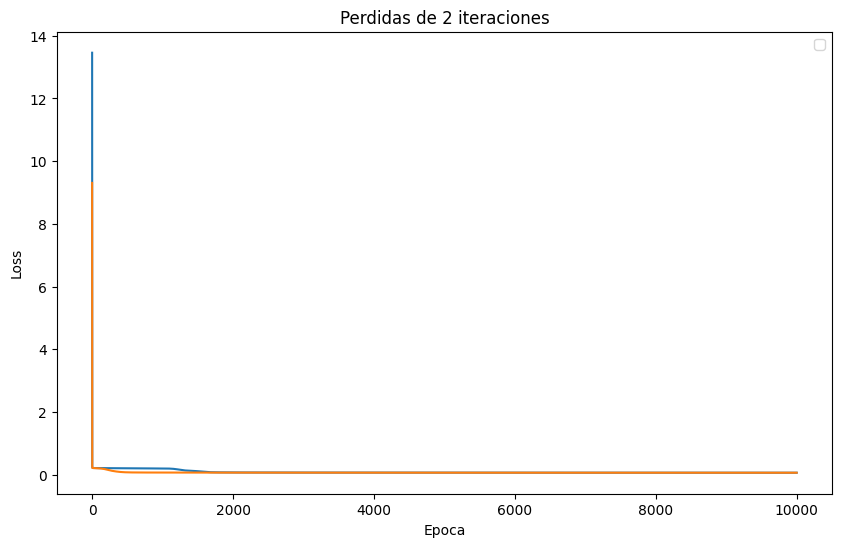

In [206]:
accuracyes_1 = np.array([]) #Lista de acuraccye de cada iteracion
total_loss = [] #Lista de perdidas de cada iteracion
pesos_sesgos_1 = [] #Guardamos los pesos y bias en una lista, 
                    #para poder usar despues el que mejosr accuracy tuvo
for a in range(n):
    print(f"Iteracion {a}")
    #Iniciamos pesos y sesgos aleatorios para la primer capa oculta
    W1 = np.random.random(size=(2,8)) 
    b1 = np.random.random(size=(1,8)) 
    #Pesos y sesgo segunda capa oculta
    W2= np.random.random(size=(8,8)) 
    b2 = np.random.random(size=(1,8)) 
    #Pesos de la ultima capa
    W3 = np.random.random(size=(8,3)) 

    #Tasa de aprendizaje
    lr=0.0001

    #Lista para guardar las perdidaas
    losses = np.array([])

    for i in range(10000):
        #Propagacion hacia delante con pesos aletorios
        dW1,dW2,dW3,db1,db2,yhat = backpropagation_1(X_train,y_train,W1,W2,W3,b1,b2)
        #Calculo de la perdida
        loss = loss_function(yhat,y_train)
        losses=np.append(losses,loss)
        if i%1000 == 0:
            print(f"Epoca {i}, perdida {loss}")
        #Calculo de las derivadas y ajuste a pesos y sesgos
        W1,W2,W3,b1,b2 = update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr)
    #print(losses_1)
    total_loss.append(losses)
    #print(total_loss)
    #plot_loss(losses_1)


    #Prueba del modelo en el conjunto test
    #Guardamos los pesos y bias de la iteracion
    pesos_act = [W1,W2,W3,b1,b2]
    pesos_sesgos_1.append(pesos_act)

    #Se realiza el feed forward en el vonunto test, 
    # con los pesos optimizados
    _,_,_,_,y_hat=feed_forward_1(X_test,W1,W2,W3,b1,b2)

    #predicciones
    pred = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores de maximo valor de cada lista 
    #etiquetas verdaderas
    true =  np.argmax(y_test,axis=1)

    #Calculo del accuracy del modelo 
    accuracy = (np.sum(pred==true)/len(true))*100
    accuracyes_1 = np.append(accuracyes_1,accuracy)
    
    print(f"Accuracy del modelo {round(accuracy,2)}%")

total_loss =np.array(total_loss)

plt.figure(figsize=(10,6))
for i,perdida in enumerate(total_loss):
    plt.plot(perdida)
plt.legend()
plt.title(f"Perdidas de {n} iteraciones")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

Promedio de accuracy para el modelo con sigmoide

In [207]:
print(f"Mean accuracy {np.round(np.mean(accuracyes_1),2)}%")

Mean accuracy 85.5%


### Retropropagacion tanh

Iteracion 0
Epoca 0, perdida 11.73756172736415
Epoca 1000, perdida 0.06571807542531041
Epoca 2000, perdida 0.06119917611457737
Epoca 3000, perdida 0.060611095015330095
Epoca 4000, perdida 0.06111738893567828
Epoca 5000, perdida 0.1074563796677962
Epoca 6000, perdida 0.08805726608481045
Epoca 7000, perdida 0.07780990501528925
Epoca 8000, perdida 0.10503621729683708
Epoca 9000, perdida 0.08623025214047353
Accuracy del modelo 82.33%
Iteracion 1
Epoca 0, perdida 13.42509253898104
Epoca 1000, perdida 0.0793105903050587
Epoca 2000, perdida 0.07720374721079094
Epoca 3000, perdida 0.06776496887894529
Epoca 4000, perdida 0.06400664412175705
Epoca 5000, perdida 0.0714556822610095
Epoca 6000, perdida 0.09428729364497081
Epoca 7000, perdida 0.17600920914898974
Epoca 8000, perdida 0.19693744017418416
Epoca 9000, perdida 0.19807508535351806
Accuracy del modelo 50.0%


/tmp/ipykernel_10659/2044915817.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


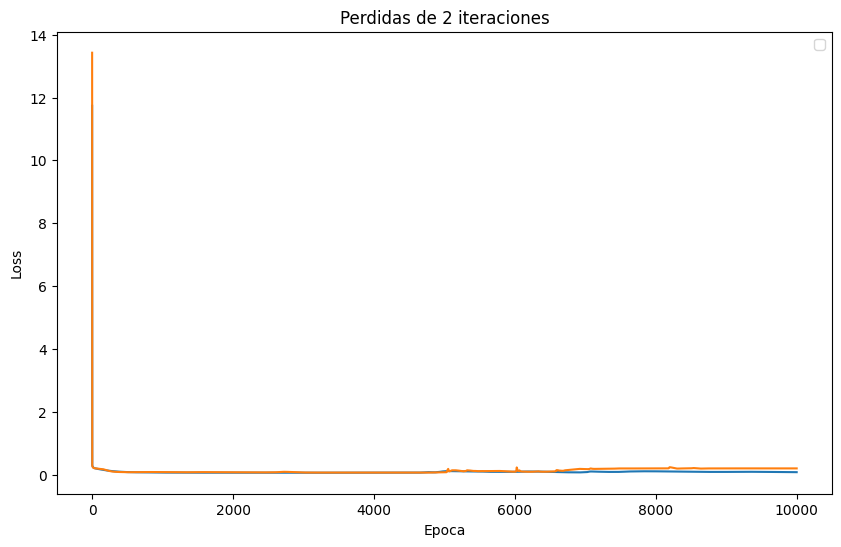

In [208]:
#Note que la prpagacion hacia atras se hace con el modelo 2
accuracyes_2 = np.array([])
total_loss_2 = []
pesos_sesgos_2 = []
for a in range(n):
    print(f"Iteracion {a}")
    #Iniciamos pesos y sesgos aleatorios para la primer capa oculta
    W1 = np.random.random(size=(2,8)) 
    b1 = np.random.random(size=(1,8)) 
    #Pesos y sesgo segunda capa oculta
    W2= np.random.random(size=(8,8)) 
    b2 = np.random.random(size=(1,8)) 
    #Pesos de la ultima capa
    W3 = np.random.random(size=(8,3)) 

    #Tasa de aprendizaje
    lr=0.0001

    #Lista para guardar las perdidaas
    losses = np.array([])

    for i in range(10000):
        #Propagacion hacia delante con pesos aletorios
        dW1,dW2,dW3,db1,db2,yhat = backpropagation_2(X_train,y_train,W1,W2,W3,b1,b2)
        #Calculo de la perdida
        loss = loss_function(yhat,y_train)
        losses=np.append(losses,loss)
        if i%1000 == 0:
            print(f"Epoca {i}, perdida {loss}")
        #Calculo de las derivadas y ajuste a pesos y sesgos
        W1,W2,W3,b1,b2 = update_wights(W1,W2,W3,b1,b2,dW1,dW2,dW3,db1,db2,lr)
    #print(losses_1)
    total_loss_2.append(losses)
    #print(total_loss)
    #plot_loss(losses_1)


    #Prueba del modelo en el conjunto test

    #Guardamos los pesos y bias de la iteracion
    pesos_act = [W1,W2,W3,b1,b2]
    
    pesos_sesgos_2.append(pesos_act)

    #Se realiza el feed forward en el vonunto test, 
    # con los pesos optimizados
    _,_,_,_,y_hat=feed_forward_2(X_test,W1,W2,W3,b1,b2)

    #predicciones
    pred = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores de maximo valor de cada lista 
    #etiquetas verdaderas
    true =  np.argmax(y_test,axis=1)

    #Calculo del accuracy del modelo 
    accuracy = (np.sum(pred==true)/len(true))*100
    accuracyes_2 = np.append(accuracyes_2,accuracy)
    
    print(f"Accuracy del modelo {round(accuracy,2)}%")

total_loss_2 =np.array(total_loss_2)

plt.figure(figsize=(10,6))
for i,perdida in enumerate(total_loss_2):
    plt.plot(perdida)
plt.legend()
plt.title(f"Perdidas de {n} iteraciones")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

In [209]:
print(f"Mean accuracy {np.round(np.mean(accuracyes_2),2)}%")

Mean accuracy 66.17%


Mejores parametros de la red para las diferentes arquitecturas, basandonos en el accuracy

In [232]:
#Modelo con sigmoide en la segunda capaa de activacion

#Se obtiene el indice de la iteracion con el mejor accuracy
index = np.where(np.round(accuracyes_1,2) == np.max(np.round(accuracyes_1,2)))[0][0]
#Obtenemos los pesos y bias asociados de el mejor accuracy
best_parameters_1 = pesos_sesgos_1[index]

#Modelo con tanh en la segunda capaa de activacion

index = np.where(np.round(accuracyes_2,2) == np.max(np.round(accuracyes_2,2)))[0][0]

best_parameters_2 = pesos_sesgos_2[index]

In [244]:
#Mejores parametros modelo 1
W1_b = best_parameters_1[0]
W2_b = best_parameters_1[1]
W3_b = best_parameters_1[2]
b1_b = best_parameters_1[3]
b2_b = best_parameters_1[4]

_,_,_,_,y_hat=feed_forward_1(X_test,W1_b,W2_b,W3_b,b1_b,b2_b)

#predicciones
pred_1 = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores

#Mejores parametros modelo 2
W1_b2 = best_parameters_2[0]
W2_b2 = best_parameters_2[1]
W3_b2 = best_parameters_2[2]
b1_b2 = best_parameters_2[3]
b2_b2 = best_parameters_2[4]

_,_,_,_,y_hat=feed_forward_2(X_test,W1_b2,W2_b2,W3_b2,b1_b2,b2_b2)

#predicciones
pred_2 = np.argmax(y_hat,axis=1) #np.argmax crea una lista con los valores


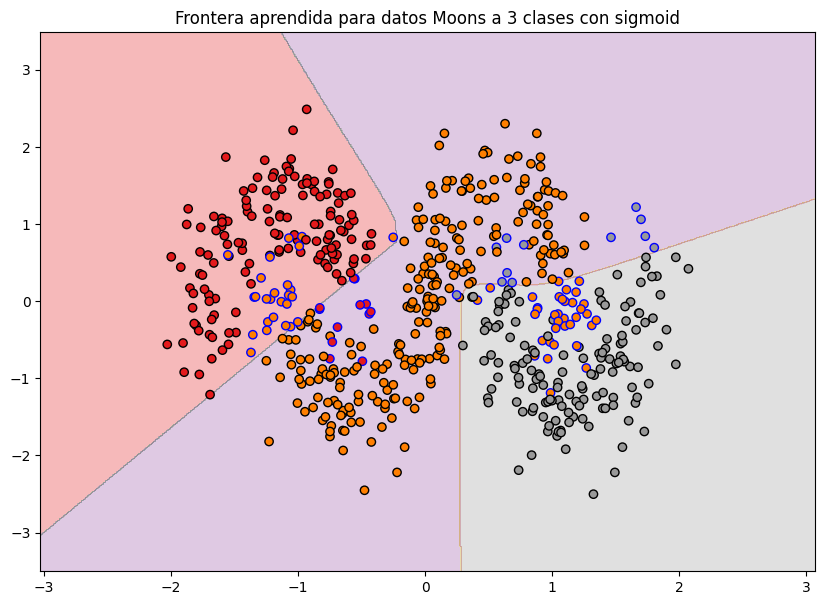

In [273]:
plt.figure(figsize=(10,7))
true =  np.argmax(y_test,axis=1)
#Valores para el plano (Eje x y Eje y)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
#En esta parte se aplanan los puntos de xx y yy y despues se unen cpn c_
grid = np.c_[xx.ravel(), yy.ravel()]
_,_,_,_,Z =feed_forward_1(grid,W1_b,W2_b,W3_b,b1_b,b2_b)
Z=np.argmax(Z,axis=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
colors = []
edge_cols = []
for i in range(0,true.shape[0]):
    colors.append( true[i] )
    if pred_1[i] == true[i] :
        edge_cols.append( 'black' )
    else:
        edge_cols.append( 'blue' )
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors,edgecolors=edge_cols ,cmap=plt.cm.Set1)
plt.title('Frontera aprendida para datos Moons a 3 clases con sigmoid')
plt.show()

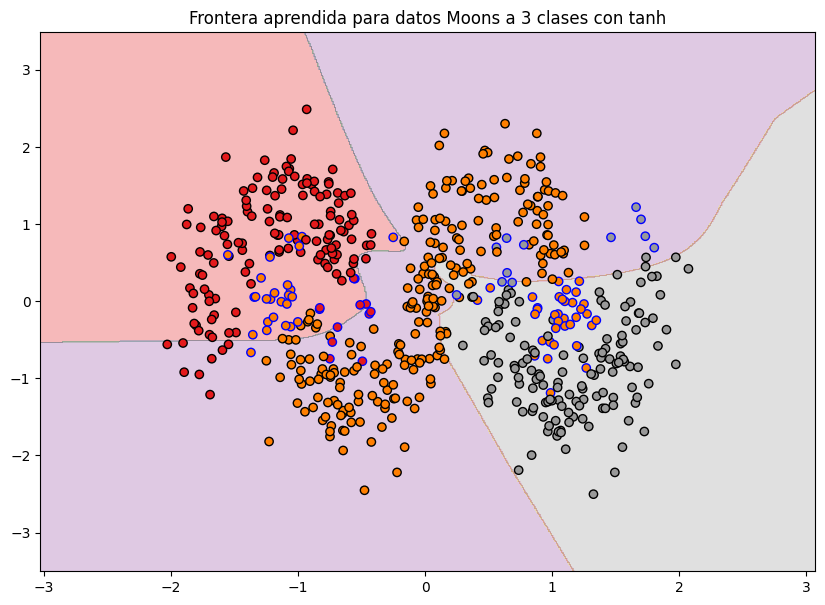

In [275]:
plt.figure(figsize=(10,7))
true =  np.argmax(y_test,axis=1)
#Valores para el plano (Eje x y Eje y)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
#En esta parte se aplanan los puntos de xx y yy y despues se unen cpn c_
grid = np.c_[xx.ravel(), yy.ravel()]
_,_,_,_,Z =feed_forward_2(grid,W1_b2,W2_b2,W3_b2,b1_b2,b2_b2)
Z=np.argmax(Z,axis=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
colors = []
edge_cols = []
for i in range(0,true.shape[0]):
    colors.append( true[i] )
    if pred_1[i] == true[i] :
        edge_cols.append( 'black' )
    else:
        edge_cols.append( 'blue' )
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors,edgecolors=edge_cols ,cmap=plt.cm.Set1)
plt.title('Frontera aprendida para datos Moons a 3 clases con tanh')
plt.show()